In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set()

In [2]:
df_titanic = pd.read_csv("../train.csv")

In [3]:
df_titanic.shape

(891, 12)

In [4]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Dead,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Queenstown
1,2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Southampton
2,3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Queenstown
3,4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Queenstown
4,5,Dead,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Queenstown


In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_titanic['Survived'] = pd.Categorical(df_titanic['Survived'])

df_titanic['Embarked'] = df_titanic['Embarked'].fillna('Unknown')
df_titanic['Embarked'] = pd.Categorical(df_titanic['Embarked'])

In [12]:
df_titanic['Embarked'].unique()
df_titanic['Survived'].unique()

[Dead, Survived]
Categories (2, object): [Dead, Survived]

In [11]:
df_titanic['Survived'] = df_titanic['Survived'].cat.rename_categories(['Dead','Survived'])
df_titanic['Embarked'] = df_titanic['Embarked'].cat.rename_categories(['Southampton', 'Cherbourg', 'Queenstown', 'Unknown'])

In [ ]:
## How many survived?
## How many were men versus women?
## What was the distribution of the age group?

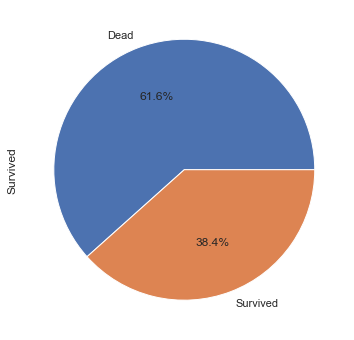

In [26]:
plt.figure(figsize=(8,6))
df_titanic['Survived'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')

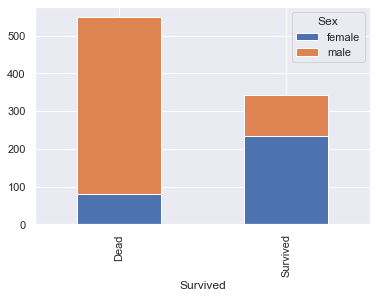

In [27]:
pd.crosstab(df_titanic['Survived'], df_titanic['Sex']).plot(kind='bar', stacked=True)

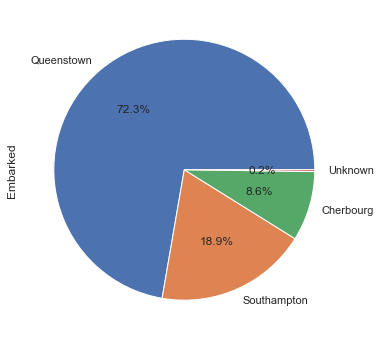

In [38]:
plt.figure(figsize = (8,6))
df_titanic['Embarked'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')

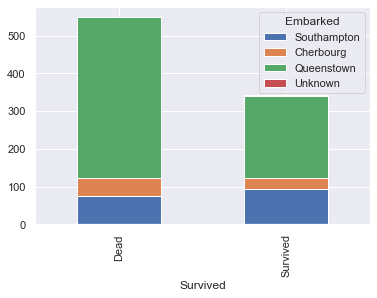

In [31]:
pd.crosstab(df_titanic['Survived'], df_titanic['Embarked']).plot(kind = 'bar', stacked = True)

In [39]:
df_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([24., 20., 10., 14., 10., 35., 67., 67., 72., 65., 64., 49., 40.,
        35., 27., 26., 25., 14., 15.,  9., 11.,  7.,  1.,  5.,  1.,  0.]),
 array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48,
        51, 54, 57, 60, 63, 66, 69, 72, 75, 78]),
 <a list of 26 Patch objects>)

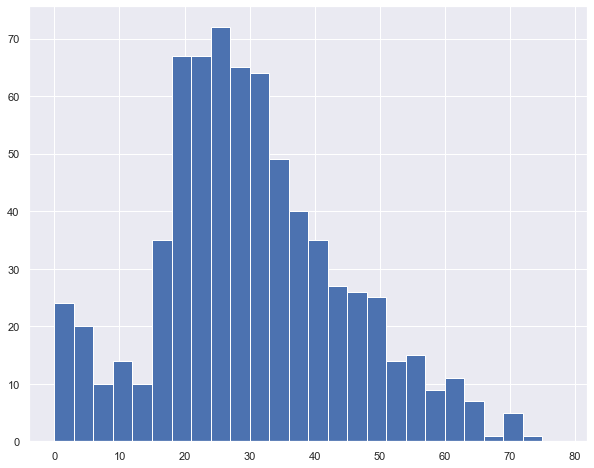

In [42]:
import numpy as np

plt.figure(figsize = (10,8))
plt.hist(df_titanic['Age'], bins = np.arange(0,81,3))

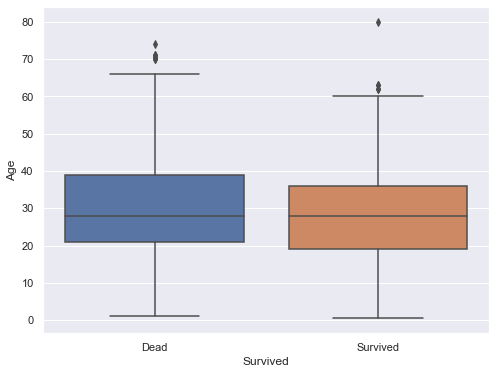

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y ='Age', data=df_titanic)